In [59]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score

In [11]:
# making a toy dataset
X =  6 * np.random.rand(200,1) - 3
y = 0.8 * X**2 + 0.9 * X + 2 + np.random.randn(200,1)

# y = 0.8x^2 + 0.9x + 2

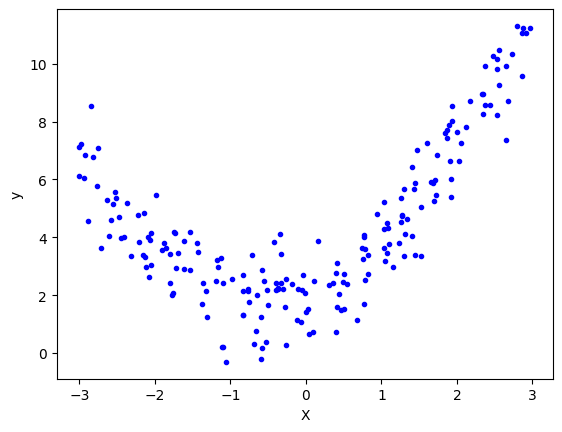

In [18]:
# graph
plt.plot(X, y,'b.')
plt.xlabel('X')
plt.ylabel('y')
plt.show()


In [19]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [20]:
# Apply Linear regression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [22]:
y_pred = lr.predict(X_test)
r2_score(y_test, y_pred)

0.26031949480600725

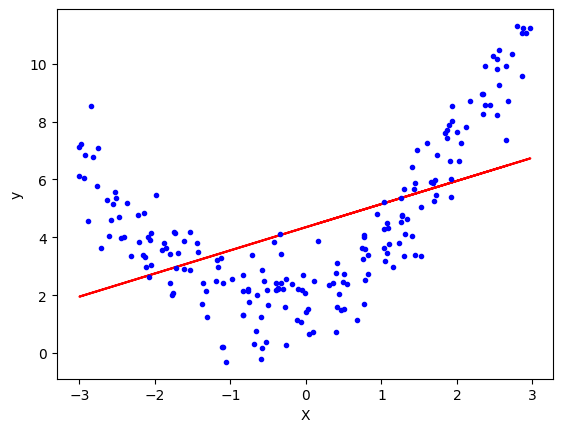

In [23]:
# Plotting regression line on training data
plt.plot(X_train, lr.predict(X_train), color='red')
plt.plot(X, y, 'b.')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [24]:
# Applying Polynomial Linear Regression
# degree = 2

poly = PolynomialFeatures(degree=2)

# Apply transformation to X_train, X_test and not on y_test, y_train
X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.transform(X_test)

In [27]:
print(X_train[0])
print(X_train_trans[0])

[0.16042501]
[1.         0.16042501 0.02573618]


In [ ]:
# Include bias parameter

In [28]:
lr1 = LinearRegression()
lr1.fit(X_train_trans, y_train)

LinearRegression()

In [31]:
y_pred1 = lr1.predict(X_test_trans)
r2_score(y_test, y_pred1)

0.8802318983634311

In [32]:
print(lr1.coef_)
print(lr1.intercept_)

[[0.         0.87945181 0.80439105]]
[2.05347582]


In [34]:
X_new = np.linspace(-3, 3, 200).reshape(200,1)
X_new_poly = poly.transform(X_new)
y_new = lr1.predict(X_new_poly)

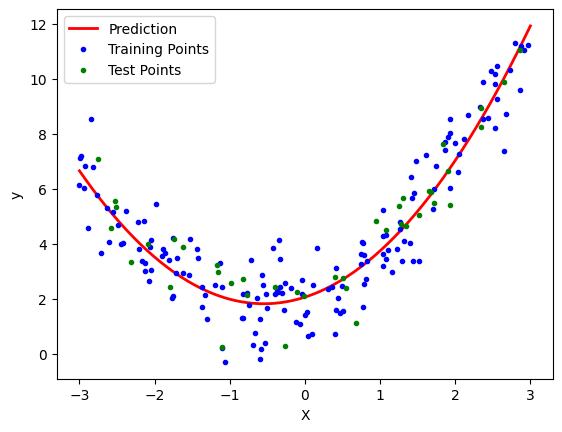

In [39]:
plt.plot(X_new, y_new, 'r-', linewidth=2, label='Prediction')
plt.plot(X_train, y_train, 'b.', label='Training Points')
plt.plot(X_test, y_test, 'g.', label='Test Points')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

In [44]:
def polynomial_regression(degree):
  X_new = np.linspace(-3,3,100).reshape(100,1)
  X_new_poly = poly.transform(X_new)

  polybig_features = PolynomialFeatures(degree=degree)
  std_scaler = StandardScaler()
  lin_reg = LinearRegression()
  polynomial_regression = Pipeline([
      ('poly_features', polybig_features),
      ('std_scaler', std_scaler),
      ('lin_reg', lin_reg),
  ])

  polynomial_regression.fit(X, y)
  y_newbig = polynomial_regression.predict(X_new)
  plt.plot(X_new, y_newbig, 'r', label='Degree' + str(degree), linewidth=2)

  plt.plot(X_train, y_train, 'b.', linewidth=3)
  plt.plot(X_test, y_test, 'g.', linewidth=3)
  plt.legend(loc='upper left')
  plt.xlabel('X')
  plt.ylabel('y')
  plt.axis([-3, 3, 0, 10])
  plt.show()

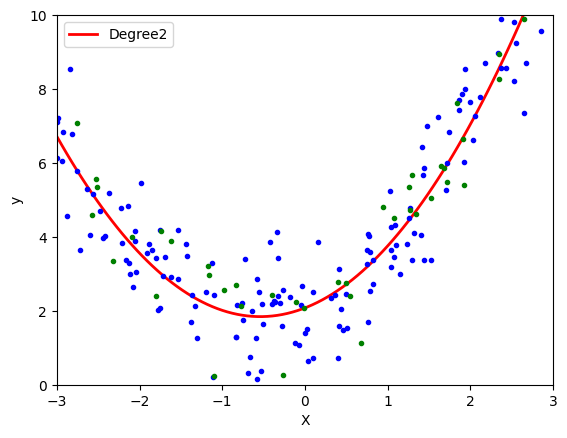

In [50]:
# Change degree to see how polynomial lines fits the data points
polynomial_regression(2)

In [51]:
# 3D Polynomial Regression

x = 7 * np.random.rand(100,1) - 2.8
y = 7 * np.random.rand(100, 1) - 2.8

z = x**2 + y**2 + 0.2*x + 0.2*y + 0.1*x*y + 2 + np.random.randn(100,1)

# z = x^2 + y^2 + 0.2x + 0.2y + 0.1xy + 2

In [52]:
import plotly.express as px
df = px.data.iris()
fig = px.scatter_3d(df, x=x.ravel(), y=y.ravel(), z=z.ravel())
fig.show()

In [55]:
# On simple linear regression

lr2 = LinearRegression()
lr2.fit(np.array([x,y]).reshape(100,2),z)

x_input = np.linspace(x.min(), x.max(), 10)
y_input = np.linspace(y.min(), y.max(), 10)
xGrid, yGrid = np.meshgrid(x_input, y_input)

final = np.vstack((xGrid.ravel().reshape(1,100), yGrid.ravel().reshape(1,100))).T

z_final = lr2.predict(final).reshape(10,10)


In [56]:
import plotly.graph_objects as go

fig = px.scatter_3d(df, x=x.ravel(), y=y.ravel(), z=z.ravel())
fig.add_trace(go.Surface(x=x_input, y=y_input, z=z_final))
fig.show()

In [57]:
# Polynomial for degree 2

X_multi = np.array([x, y]).reshape(100,2)
X_multi.shape

(100, 2)

In [72]:
poly = PolynomialFeatures(degree=10)
X_multi_trans = poly.fit_transform(X_multi)
X_multi_trans.shape

(100, 66)

In [67]:
print("Input", poly.n_input_features_)
print("Output", poly.n_output_features_)
print("Powers\n", poly.powers)

AttributeError: 'PolynomialFeatures' object has no attribute 'n_input_features_'

In [73]:
lr3 = LinearRegression()
lr3.fit(X_multi_trans, z)

LinearRegression()

In [74]:
X_test_multi = poly.transform(final)
z_final = lr3.predict(X_multi_trans).reshape(10,10)

In [75]:
fig = px.scatter_3d(x=x.ravel(), y=y.ravel(), z=z.ravel())
fig.add_trace(go.Surface(x=x_input, y=y_input, z=z_final))
fig.update_layout(scene=dict(zaxis=dict(range=[0,35])))
fig.show()